<a href="https://colab.research.google.com/github/Pimchanok6430205105/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

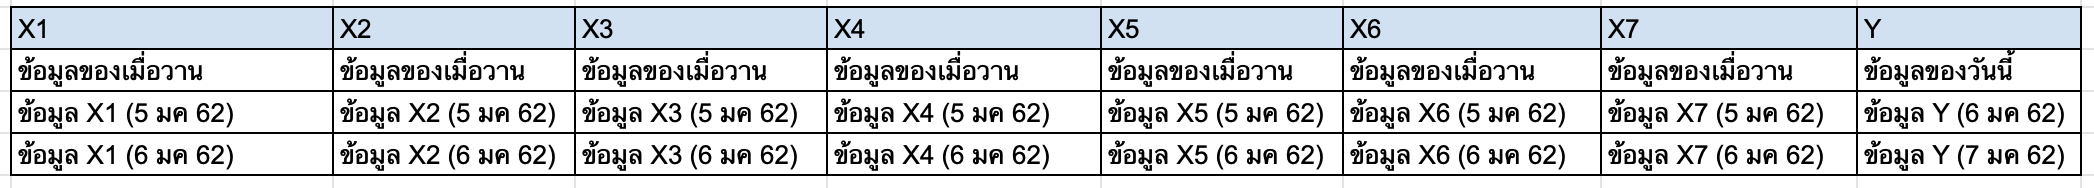

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd

#import data 40 ตาราง

In [3]:
#1.ความกด(%)
Airpressure_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Airpressure_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Airpressure_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
Airpressure_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
Airpressure_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)
#2.ความชื้นสัมพัทธ์(%)
Re_Humidity_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Re_Humidity_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Re_Humidity_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
Re_Humidity_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
Re_Humidity_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)
#3.ความเร็วลม(นอต)
Wind_Speed_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
Wind_Speed_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
Wind_Speed_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
Wind_Speed_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
Wind_Speed_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)
#4.จำนวนเมฆ(10ส่วน)
Clouds_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx",header=4)
Clouds_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4)
Clouds_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4)
Clouds_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4)
Clouds_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4)
#5.ปริมาณฝน(มม.)
Rainfall_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rainfall_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rainfall_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
Rainfall_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
Rainfall_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)
#6.อุณหภูมิจุดน้ำค้าง(เซลเซียส)
Dew_Temp_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dew_Temp_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dew_Temp_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dew_Temp_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dew_Temp_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)
#7.อุณหภูมิตุ้มแห้ง(เซลเซียส)
Dry_Temp_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dry_Temp_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dry_Temp_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dry_Temp_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dry_Temp_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)
#8.อุณหภูมิต่ำสุด(เซลเซียส)
Lowest_Temp_Khonkaen = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Lowest_Temp_Nakhonphanom = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Lowest_Temp_Sakonnakhon = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
Lowest_Temp_Nongkhai = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Lowest_Temp_loei = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx",header=4)


##เปลี่ยนชื่อ column

In [4]:
name={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [5]:
#1.ความกด(%)
Airpressure_Khonkaen = Airpressure_Khonkaen.rename(columns=name)
Airpressure_Nakhonphanom = Airpressure_Nakhonphanom.rename(columns=name)
Airpressure_Sakonnakhon = Airpressure_Sakonnakhon.rename(columns=name)
Airpressure_Nongkhai = Airpressure_Nongkhai.rename(columns=name)
Airpressure_loei = Airpressure_loei.rename(columns=name)
#2.ความชื้นสัมพัทธ์(%)
Re_Humidity_Khonkaen = Re_Humidity_Khonkaen.rename(columns=name)
Re_Humidity_Nakhonphanom = Re_Humidity_Nakhonphanom.rename(columns=name)
Re_Humidity_Sakonnakhon = Re_Humidity_Sakonnakhon.rename(columns=name)
Re_Humidity_Nongkhai = Re_Humidity_Nongkhai.rename(columns=name)
Re_Humidity_loei = Re_Humidity_loei.rename(columns=name)
#3.ความเร็วลม(นอต)
Wind_Speed_Khonkaen = Wind_Speed_Khonkaen.rename(columns=name)
Wind_Speed_Nakhonphanom = Wind_Speed_Nakhonphanom.rename(columns=name)
Wind_Speed_Sakonnakhon = Wind_Speed_Sakonnakhon.rename(columns=name)
Wind_Speed_Nongkhai = Wind_Speed_Nongkhai.rename(columns=name)
Wind_Speed_loei = Wind_Speed_loei.rename(columns=name)
#4.จำนวนเมฆ(10ส่วน)
Clouds_Khonkaen = Clouds_Khonkaen.rename(columns=name)
Clouds_Nakhonphanom = Clouds_Nakhonphanom.rename(columns=name)
Clouds_Sakonnakhon = Clouds_Sakonnakhon.rename(columns=name)
Clouds_Nongkhai = Clouds_Nongkhai.rename(columns=name)
Clouds_loei = Clouds_loei.rename(columns=name)
#5.ปริมาณฝน(มม.)
Rainfall_Khonkaen = Rainfall_Khonkaen.rename(columns=name)
Rainfall_Nakhonphanom = Rainfall_Nakhonphanom.rename(columns=name)
Rainfall_Sakonnakhon = Rainfall_Sakonnakhon.rename(columns=name)
Rainfall_Nongkhai = Rainfall_Nongkhai.rename(columns=name)
Rainfall_loei = Rainfall_loei.rename(columns=name)
#6.อุณหภูมิจุดน้ำค้าง(เซลเซียส)
Dew_Temp_Khonkaen = Dew_Temp_Khonkaen.rename(columns=name)
Dew_Temp_Nakhonphanom = Dew_Temp_Nakhonphanom.rename(columns=name)
Dew_Temp_Sakonnakhon = Dew_Temp_Sakonnakhon.rename(columns=name)
Dew_Temp_Nongkhai = Dew_Temp_Nongkhai.rename(columns=name)
Dew_Temp_loei = Dew_Temp_loei.rename(columns=name)
#7.อุณหภูมิตุ้มแห้ง(เซลเซียส)
Dry_Temp_Khonkaen = Dry_Temp_Khonkaen.rename(columns=name)
Dry_Temp_Nakhonphanom = Dry_Temp_Nakhonphanom.rename(columns=name)
Dry_Temp_Sakonnakhon = Dry_Temp_Sakonnakhon.rename(columns=name)
Dry_Temp_Nongkhai = Dry_Temp_Nongkhai.rename(columns=name)
Dry_Temp_loei = Dry_Temp_loei.rename(columns=name)
#8.อุณหภูมิต่ำสุด(เซลเซียส)
Lowest_Temp_Khonkaen = Lowest_Temp_Khonkaen.rename(columns=name)
Lowest_Temp_Nakhonphanom = Lowest_Temp_Nakhonphanom.rename(columns=name)
Lowest_Temp_Sakonnakhon = Lowest_Temp_Sakonnakhon.rename(columns=name)
Lowest_Temp_Nongkhai = Lowest_Temp_Nongkhai.rename(columns=name)
Lowest_Temp_loei = Lowest_Temp_loei.rename(columns=name)


In [6]:
def check_column_names(df, expected_names):
    # Extract the expected column names from the values of the mapping dictionary
    expected_columns = list(expected_names.values())

    # Check if all expected columns are in the DataFrame's columns
    missing_columns = [col for col in expected_columns if col not in df.columns]

    if not missing_columns:
        print("All expected columns are present.")
    else:
        print(f"Missing columns: {missing_columns}")


In [7]:
# check ว่าทุกคอลัมเป็นไปตามตารางต้นแบบ
dataframes = [
    Airpressure_Khonkaen, Airpressure_Nakhonphanom, Airpressure_Sakonnakhon, Airpressure_Nongkhai, Airpressure_loei,
    Re_Humidity_Khonkaen, Re_Humidity_Nakhonphanom, Re_Humidity_Sakonnakhon, Re_Humidity_Nongkhai, Re_Humidity_loei,
    Wind_Speed_Khonkaen, Wind_Speed_Nakhonphanom, Wind_Speed_Sakonnakhon, Wind_Speed_Nongkhai, Wind_Speed_loei,
    Clouds_Khonkaen, Clouds_Nakhonphanom, Clouds_Sakonnakhon, Clouds_Nongkhai, Clouds_loei,
    Rainfall_Khonkaen, Rainfall_Nakhonphanom, Rainfall_Sakonnakhon, Rainfall_Nongkhai, Rainfall_loei,
    Dew_Temp_Khonkaen, Dew_Temp_Nakhonphanom, Dew_Temp_Sakonnakhon, Dew_Temp_Nongkhai, Dew_Temp_loei,
    Dry_Temp_Khonkaen, Dry_Temp_Nakhonphanom, Dry_Temp_Sakonnakhon, Dry_Temp_Nongkhai, Dry_Temp_loei,
    Lowest_Temp_Khonkaen, Lowest_Temp_Nakhonphanom, Lowest_Temp_Sakonnakhon, Lowest_Temp_Nongkhai, Lowest_Temp_loei
]
# Check each DataFrame
for df in dataframes:
    check_column_names(df, name)


All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected c

พบว่าชื่อ column ของ Lowest_Temp_loei ยังไม่เปลี่ยน จึงทำการแก้ไข

In [8]:
columns_to_rename = {
    'Unnamed: 0': 'ที่',
    'Unnamed: 1': 'สถานี',
    'Unnamed: 2': 'เดือน/ปี',
    'Unnamed: 34': 'ค่าเฉลี่ย'
}
Lowest_Temp_loei = Lowest_Temp_loei.rename(columns=columns_to_rename)
Lowest_Temp_loei


,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6
5,3,353201-เลย จ.เลย,2012-10-01,21.6,22.0,23.1,22.5,23.5,23.9,23.0,...,21.9,20.2,22.0,21.0,22.0,21.5,22,22.5,23.6,22.1
6,4,353201-เลย จ.เลย,2012-11-01,21,19.2,19.9,21.8,21.5,23.0,22.0,...,22.4,23.5,22.0,22.8,22.8,21.1,23,23.6,-,22.0
7,5,353201-เลย จ.เลย,2012-12-01,23,22.6,22.6,23.5,21.5,22.2,20.0,...,20.0,15.1,17.2,17.9,19.0,18.5,17.4,18.6,14.6,19.3
8,6,353201-เลย จ.เลย,2013-01-01,13,15.3,16.8,17.0,15.3,15.8,14.4,...,17.2,19.9,20.0,19.2,21.0,19.5,20.3,18.8,21.4,17.3
9,7,353201-เลย จ.เลย,2013-02-01,19,18.9,18.2,20.0,18.6,19.4,18.6,...,19.0,16.5,17.5,20.5,21.5,23,-,-,-,19.5


In [9]:
# เช็คอีกรอบ
dataframes = [
    Airpressure_Khonkaen, Airpressure_Nakhonphanom, Airpressure_Sakonnakhon, Airpressure_Nongkhai, Airpressure_loei,
    Re_Humidity_Khonkaen, Re_Humidity_Nakhonphanom, Re_Humidity_Sakonnakhon, Re_Humidity_Nongkhai, Re_Humidity_loei,
    Wind_Speed_Khonkaen, Wind_Speed_Nakhonphanom, Wind_Speed_Sakonnakhon, Wind_Speed_Nongkhai, Wind_Speed_loei,
    Clouds_Khonkaen, Clouds_Nakhonphanom, Clouds_Sakonnakhon, Clouds_Nongkhai, Clouds_loei,
    Rainfall_Khonkaen, Rainfall_Nakhonphanom, Rainfall_Sakonnakhon, Rainfall_Nongkhai, Rainfall_loei,
    Dew_Temp_Khonkaen, Dew_Temp_Nakhonphanom, Dew_Temp_Sakonnakhon, Dew_Temp_Nongkhai, Dew_Temp_loei,
    Dry_Temp_Khonkaen, Dry_Temp_Nakhonphanom, Dry_Temp_Sakonnakhon, Dry_Temp_Nongkhai, Dry_Temp_loei,
    Lowest_Temp_Khonkaen, Lowest_Temp_Nakhonphanom, Lowest_Temp_Sakonnakhon, Lowest_Temp_Nongkhai, Lowest_Temp_loei
]
# Check each DataFrame
for df in dataframes:
    check_column_names(df, name)

All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected columns are present.
All expected c

#จังหวัดขอนแก่น

Airpressure_Khonkaen

In [11]:
Airpressure_Khonkaen['ปี'] = Airpressure_Khonkaen['เดือน/ปี'].dt.year
Airpressure_Khonkaen['เดือน'] = Airpressure_Khonkaen['เดือน/ปี'].dt.month
Airpressure_Khonkaen = Airpressure_Khonkaen.drop(['เดือน/ปี'], axis=1)
Airpressure_Khonkaen.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,ปี,เดือน
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,2012,2


In [24]:
PS_KK_1 = Airpressure_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
PS_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_KK_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_KK_1['จังหวัด'] = len(PS_KK_1)*['ขอนแก่น']

PS_KK_2 = PS_KK_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_KK_3 = PS_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]

PS_KK_3["ที่"] = ['kk'] + PS_KK_3["index"].astype(str)
PS_KK_3.drop(['index'],axis=1)

PS_KK_4 = PS_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_KK_4

<ipython-input-24-d0027086d37a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_KK_3["ที่"] = ['kk'] + PS_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,kk0,ขอนแก่น,2011,10,1,1005.47
1,kk1,ขอนแก่น,2011,10,2,1006.65
2,kk2,ขอนแก่น,2011,10,3,1007.49
3,kk3,ขอนแก่น,2011,10,4,1008.28
4,kk4,ขอนแก่น,2011,10,5,1009.88
...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,1013.04
1756,kk1756,ขอนแก่น,2022,2,29,1013.37
1757,kk1757,ขอนแก่น,2022,2,30,1013.98
1758,kk1758,ขอนแก่น,2022,2,31,-


Re_Humidity_Khonkaen

In [20]:

Re_Humidity_Khonkaen['ปี'] = Re_Humidity_Khonkaen['เดือน/ปี'].dt.year
Re_Humidity_Khonkaen['เดือน'] = Re_Humidity_Khonkaen['เดือน/ปี'].dt.month
Re_Humidity_Khonkaen = Re_Humidity_Khonkaen.drop(['เดือน/ปี'], axis=1)
Re_Humidity_Khonkaen.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,ค่าเฉลี่ย,ปี,เดือน
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,73,69,69,75,71,71,68,79,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,65,67,68,67,67,65,-,68,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,60,62,65,66,63,64,63,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,75,71,75,69,70,67,68,69,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,48,57,71,73,68,-,-,65,2012,2


In [22]:
RH_KK_1 = Re_Humidity_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RH_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_KK_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_KK_1

RH_KK_1['จังหวัด'] = len(RH_KK_1)*['ขอนแก่น']
RH_KK_1

RH_KK_2 = RH_KK_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_KK_3 = RH_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_KK_3

RH_KK_3["ที่"] = ['kk'] + RH_KK_3["index"].astype(str)
RH_KK_3.drop(['index'],axis=1)

RH_KK_4 = RH_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_KK_4

<ipython-input-22-c4db9ad7959f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_KK_3["ที่"] = ['kk'] + RH_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,kk0,ขอนแก่น,2011,10,1,83
1,kk1,ขอนแก่น,2011,10,2,92
2,kk2,ขอนแก่น,2011,10,3,86
3,kk3,ขอนแก่น,2011,10,4,80
4,kk4,ขอนแก่น,2011,10,5,86
...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,62
1756,kk1756,ขอนแก่น,2022,2,29,-
1757,kk1757,ขอนแก่น,2022,2,30,-
1758,kk1758,ขอนแก่น,2022,2,31,-


Wind_Speed_Khonkaen

In [23]:

Wind_Speed_Khonkaen['ปี'] = Wind_Speed_Khonkaen['เดือน/ปี'].dt.year
Wind_Speed_Khonkaen['เดือน'] = Wind_Speed_Khonkaen['เดือน/ปี'].dt.month
Wind_Speed_Khonkaen = Wind_Speed_Khonkaen.drop(['เดือน/ปี'], axis=1)

WS_KK_1 = Wind_Speed_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
WS_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_KK_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_KK_1

WS_KK_1['จังหวัด'] = len(WS_KK_1)*['ขอนแก่น']
WS_KK_1

WS_KK_2 = WS_KK_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_KK_3 = WS_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_KK_3

WS_KK_3["ที่"] = ['kk'] + WS_KK_3["index"].astype(str)
WS_KK_3.drop(['index'],axis=1)

WS_KK_4 = WS_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_KK_4


<ipython-input-23-db675d2f83e2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_KK_3["ที่"] = ['kk'] + WS_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,kk0,ขอนแก่น,2011,10,1,3
1,kk1,ขอนแก่น,2011,10,2,2
2,kk2,ขอนแก่น,2011,10,3,3
3,kk3,ขอนแก่น,2011,10,4,2
4,kk4,ขอนแก่น,2011,10,5,2
...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,2
1756,kk1756,ขอนแก่น,2022,2,29,-
1757,kk1757,ขอนแก่น,2022,2,30,-
1758,kk1758,ขอนแก่น,2022,2,31,-


Clouds_Khonkaen

In [29]:
Clouds_Khonkaen['ปี'] = Clouds_Khonkaen['เดือน/ปี'].dt.year
Clouds_Khonkaen['เดือน'] = Clouds_Khonkaen['เดือน/ปี'].dt.month
Clouds_KhonkaenK = Clouds_Khonkaen.drop(['เดือน/ปี'], axis=1)

CD_KK_1 = Clouds_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
CD_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_KK_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)

CD_KK_1['จังหวัด'] = len(CD_KK_1)*['ขอนแก่น']

CD_KK_2 = CD_KK_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_KK_3 = CD_KK_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]

CD_KK_3["ที่"] = ['kk'] + CD_KK_3["index"].astype(str)
CD_KK_3.drop(['index'],axis=1)

CD_KK_4 = CD_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_KK_4

<ipython-input-29-488337ebce9a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_KK_3["ที่"] = ['kk'] + CD_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,kk0,ขอนแก่น,2011,10,เดือน/ปี,2011-10-01 00:00:00
1,kk1,ขอนแก่น,2011,10,1,9
2,kk2,ขอนแก่น,2011,10,2,10
3,kk3,ขอนแก่น,2011,10,3,10
4,kk4,ขอนแก่น,2011,10,4,8
...,...,...,...,...,...,...
1810,kk1810,ขอนแก่น,2022,2,28,2
1811,kk1811,ขอนแก่น,2022,2,29,-
1812,kk1812,ขอนแก่น,2022,2,30,-
1813,kk1813,ขอนแก่น,2022,2,31,-


Rainfall_Khonkaen

In [32]:

R_KK_1 = Rainfall_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
R_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_KK_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

R_KK_1['จังหวัด'] = len(R_KK_1)*['ขอนแก่น']

R_KK_2 = R_KK_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_KK_3 = R_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]

R_KK_3["ที่"] = ['kk'] + R_KK_3["index"].astype(str)
R_KK_3.drop(['index'],axis=1)

R_KK_4 = R_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_KK_4

<ipython-input-32-1561bd2f2ffe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_KK_3["ที่"] = ['kk'] + R_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,ขอนแก่น,2011,10,1,1.4
1,kk1,ขอนแก่น,2011,10,2,17.7
2,kk2,ขอนแก่น,2011,10,3,3
3,kk3,ขอนแก่น,2011,10,4,0
4,kk4,ขอนแก่น,2011,10,5,2.2
...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,-
1756,kk1756,ขอนแก่น,2022,2,29,-
1757,kk1757,ขอนแก่น,2022,2,30,-
1758,kk1758,ขอนแก่น,2022,2,31,-


Dew_Temp_Khonkaen

In [33]:

Dew_Temp_Khonkaen['ปี'] = Dew_Temp_Khonkaen['เดือน/ปี'].dt.year
Dew_Temp_Khonkaen['เดือน'] = Dew_Temp_Khonkaen['เดือน/ปี'].dt.month
Dew_Temp_Khonkaen = Dew_Temp_Khonkaen.drop(['เดือน/ปี'], axis=1)
Dew_Temp_Khonkaen.head()

DPT_KK_1 = Dew_Temp_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DPT_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_KK_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)

DPT_KK_1['จังหวัด'] = len(DPT_KK_1)*['ขอนแก่น']

DPT_KK_2 = DPT_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_KK_3 = DPT_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]

DPT_KK_3["ที่"] = ['kk'] + DPT_KK_3["index"].astype(str)
DPT_KK_3.drop(['index'],axis=1)

DPT_KK_4 = DPT_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_KK_4

<ipython-input-33-167b8503086c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_KK_3["ที่"] = ['kk'] + DPT_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,24.2
1,kk1,ขอนแก่น,2011,10,2,24.0
2,kk2,ขอนแก่น,2011,10,3,22.9
3,kk3,ขอนแก่น,2011,10,4,21.9
4,kk4,ขอนแก่น,2011,10,5,21.7
...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,17.5
1756,kk1756,ขอนแก่น,2022,2,29,-
1757,kk1757,ขอนแก่น,2022,2,30,-
1758,kk1758,ขอนแก่น,2022,2,31,-


Dry_Temp_Khonkaen

In [34]:

Dry_Temp_Khonkaen['ปี'] = Dry_Temp_Khonkaen['เดือน/ปี'].dt.year
Dry_Temp_Khonkaen['เดือน'] = Dry_Temp_Khonkaen['เดือน/ปี'].dt.month
Dry_Temp_Khonkaen = Dry_Temp_Khonkaen.drop(['เดือน/ปี'], axis=1)
Dry_Temp_Khonkaen.head()

Dry_T_KK_1 = Dry_Temp_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Dry_T_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
Dry_T_KK_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)

Dry_T_KK_1['จังหวัด'] = len(Dry_T_KK_1)*['ขอนแก่น']

Dry_T_KK_2 = Dry_T_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
Dry_T_KK_3 = Dry_T_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]

Dry_T_KK_3["ที่"] = ['kk'] + Dry_T_KK_3["index"].astype(str)
Dry_T_KK_3.drop(['index'],axis=1)

Dry_T_KK_4 = Dry_T_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_KK_4

<ipython-input-34-40444fdb82e7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dry_T_KK_3["ที่"] = ['kk'] + Dry_T_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,27.6
1,kk1,ขอนแก่น,2011,10,2,25.6
2,kk2,ขอนแก่น,2011,10,3,25.6
3,kk3,ขอนแก่น,2011,10,4,25.8
4,kk4,ขอนแก่น,2011,10,5,24.3
...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,25.9
1756,kk1756,ขอนแก่น,2022,2,29,-
1757,kk1757,ขอนแก่น,2022,2,30,-
1758,kk1758,ขอนแก่น,2022,2,31,-


Lowest_Temp_Khonkaen

In [35]:

Lowest_Temp_Khonkaen['ปี'] = Lowest_Temp_Khonkaen['เดือน/ปี'].dt.year
Lowest_Temp_Khonkaen['เดือน'] = Lowest_Temp_Khonkaen['เดือน/ปี'].dt.month
Lowest_Temp_Khonkaen = Lowest_Temp_Khonkaen.drop(['เดือน/ปี'], axis=1)
Lowest_Temp_Khonkaen.head()

LW_KK_1 = Lowest_Temp_Khonkaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LW_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_KK_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)

LW_KK_1['จังหวัด'] = len(LW_KK_1)*['ขอนแก่น']

LW_KK_2 = LW_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_KK_3 = LW_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]

LW_KK_3["ที่"] = ['kk'] + LW_KK_3["index"].astype(str)
LW_KK_3.drop(['index'],axis=1)

LW_KK_4 = LW_KK_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_KK_4

<ipython-input-35-b9cb53eee91c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_KK_3["ที่"] = ['kk'] + LW_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,24.8
1,kk1,ขอนแก่น,2011,10,2,23.0
2,kk2,ขอนแก่น,2011,10,3,22.1
3,kk3,ขอนแก่น,2011,10,4,22.8
4,kk4,ขอนแก่น,2011,10,5,23.1
...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,-
1756,kk1756,ขอนแก่น,2022,2,29,-
1757,kk1757,ขอนแก่น,2022,2,30,-
1758,kk1758,ขอนแก่น,2022,2,31,-


##merge



In [37]:
merged_KK = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_KK_4[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_KK_4[['ที่','ความชื้นสัมพัทธ์(%)']], on='ที่'),
            WS_KK_4[['ที่','ความเร็วลม(นอต)']], on='ที่'),
            CD_KK_4[['ที่','จำนวนเมฆ(10ส่วน)']], on='ที่'),
            R_KK_4[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']], on='ที่'),
            DPT_KK_4[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='ที่'),
            Dry_T_KK_4[['ที่','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='ที่'),
            LW_KK_4[['ที่','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='ที่')
merged_KK

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.47,83,3,2011-10-01 00:00:00,1.4,24.2,27.6,24.8
1,kk1,ขอนแก่น,2011,10,2,1006.65,92,2,9,17.7,24.0,25.6,23.0
2,kk2,ขอนแก่น,2011,10,3,1007.49,86,3,10,3,22.9,25.6,22.1
3,kk3,ขอนแก่น,2011,10,4,1008.28,80,2,10,0,21.9,25.8,22.8
4,kk4,ขอนแก่น,2011,10,5,1009.88,86,2,8,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,1013.04,62,2,2,-,17.5,25.9,-
1756,kk1756,ขอนแก่น,2022,2,29,1013.37,-,-,3,-,-,-,-
1757,kk1757,ขอนแก่น,2022,2,30,1013.98,-,-,2,-,-,-,-
1758,kk1758,ขอนแก่น,2022,2,31,-,-,-,2,-,-,-,-


## จัดการค่า missing ด้วยค่า mean
* เนื่องจากปริมาณน้ำฝนที่มีค่า T จึงแทนค่าเป็น 0.09

In [39]:
khonkaen = merged_KK.replace({'T': 0.09})

In [40]:
khonkaen = merged_KK.replace({'-': np.NaN})
khonkaen

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.470000,83.0,3.000000,2011-10-01 00:00:00,1.4,24.200000,27.6,24.8
1,kk1,ขอนแก่น,2011,10,2,1006.650000,92.0,2.000000,9,17.7,24.000000,25.6,23.0
2,kk2,ขอนแก่น,2011,10,3,1007.490000,86.0,3.000000,10,3,22.900000,25.6,22.1
3,kk3,ขอนแก่น,2011,10,4,1008.280000,80.0,2.000000,10,0,21.900000,25.8,22.8
4,kk4,ขอนแก่น,2011,10,5,1009.880000,86.0,2.000000,8,2.2,21.700000,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,1013.040000,62.0,2.000000,2,NaN,17.500000,25.9,NaN
1756,kk1756,ขอนแก่น,2022,2,29,1013.370000,NaN,NaN,3,NaN,NaN,NaN,NaN
1757,kk1757,ขอนแก่น,2022,2,30,1013.980000,NaN,NaN,2,NaN,NaN,NaN,NaN
1758,kk1758,ขอนแก่น,2022,2,31,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN


In [41]:
khonkaen.isnull().any() #ตรวจสอบ missing

ที่                              False
จังหวัด                          False
ปี                               False
เดือน                            False
วัน                              False
ความกดอากาศ(%)                    True
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
ปริมาณน้ำฝน(มิลลิเมตร)            True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)      True
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)     True
อุณหภูมิจุดต่ำสุด(เซลเซียส)       True
dtype: bool

In [42]:
khonkaen.dtypes #ตรวจสอบชนิดของแต่ละคอลัมน์

ที่                               object
จังหวัด                           object
ปี                                 int64
เดือน                              int64
วัน                               object
ความกดอากาศ(%)                   float64
ความชื้นสัมพัทธ์(%)              float64
ความเร็วลม(นอต)                  float64
จำนวนเมฆ(10ส่วน)                  object
ปริมาณน้ำฝน(มิลลิเมตร)            object
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     float64
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)    float64
อุณหภูมิจุดต่ำสุด(เซลเซียส)      float64
dtype: object

In [43]:
khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce') #เปลี่ยน str เป็น float

In [44]:
khonkaen.dtypes

ที่                               object
จังหวัด                           object
ปี                                 int64
เดือน                              int64
วัน                               object
ความกดอากาศ(%)                   float64
ความชื้นสัมพัทธ์(%)              float64
ความเร็วลม(นอต)                  float64
จำนวนเมฆ(10ส่วน)                  object
ปริมาณน้ำฝน(มิลลิเมตร)           float64
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     float64
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)    float64
อุณหภูมิจุดต่ำสุด(เซลเซียส)      float64
dtype: object

In [45]:
mean_ps_kk = khonkaen['ความกดอากาศ(%)'].mean()
khonkaen['ความกดอากาศ(%)'] = khonkaen['ความกดอากาศ(%)'].fillna(mean_ps_kk)

In [46]:
khonkaen.isnull().any()

ที่                              False
จังหวัด                          False
ปี                               False
เดือน                            False
วัน                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
ปริมาณน้ำฝน(มิลลิเมตร)            True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)      True
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)     True
อุณหภูมิจุดต่ำสุด(เซลเซียส)       True
dtype: bool

In [49]:
khonkaen

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.470000,83.000000,3.000000,2011-10-01 00:00:00,1.4,24.200000,27.6,24.8
1,kk1,ขอนแก่น,2011,10,2,1006.650000,92.000000,2.000000,9,17.7,24.000000,25.6,23.0
2,kk2,ขอนแก่น,2011,10,3,1007.490000,86.000000,3.000000,10,3.0,22.900000,25.6,22.1
3,kk3,ขอนแก่น,2011,10,4,1008.280000,80.000000,2.000000,10,0.0,21.900000,25.8,22.8
4,kk4,ขอนแก่น,2011,10,5,1009.880000,86.000000,2.000000,8,2.2,21.700000,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,kk1755,ขอนแก่น,2022,2,28,1013.040000,62.000000,2.000000,2,NaN,17.500000,25.9,NaN
1756,kk1756,ขอนแก่น,2022,2,29,1013.370000,66.817336,3.204323,3,NaN,NaN,NaN,NaN
1757,kk1757,ขอนแก่น,2022,2,30,1013.980000,66.817336,3.204323,2,NaN,NaN,NaN,NaN
1758,kk1758,ขอนแก่น,2022,2,31,1012.615524,66.817336,3.204323,2,NaN,NaN,NaN,NaN


#จังหวัดนครพนม

Airpressure_Nakhonphanom

In [54]:


PS_NP_1 = Airpressure_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
PS_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_NP_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)


PS_NP_1['จังหวัด'] = len(PS_NP_1)*['นครพนม']


PS_NP_2 = PS_NP_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_NP_3 = PS_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]


PS_NP_3["ที่"] = ['np'] + PS_NP_3["index"].astype(str)
PS_NP_3.drop(['index'],axis=1)

PS_NP_4 = PS_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NP_4

<ipython-input-54-61c8fae6c7fc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_NP_3["ที่"] = ['np'] + PS_NP_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,np0,นครพนม,2011,10,1,1006.3
1,np1,นครพนม,2011,10,2,1007.38
2,np2,นครพนม,2011,10,3,1008.07
3,np3,นครพนม,2011,10,4,1008.44
4,np4,นครพนม,2011,10,5,1010.51
...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,1013.53
1756,np1756,นครพนม,2022,2,29,1013.37
1757,np1757,นครพนม,2022,2,30,1013.98
1758,np1758,นครพนม,2022,2,31,-


Re_Humidity_Nakhonphanom

In [55]:
Re_Humidity_Nakhonphanom['ปี'] = Re_Humidity_Nakhonphanom['เดือน/ปี'].dt.year
Re_Humidity_Nakhonphanom['เดือน'] = Re_Humidity_Nakhonphanom['เดือน/ปี'].dt.month
Re_Humidity_Nakhonphanom = Re_Humidity_Nakhonphanom.drop(['เดือน/ปี'], axis=1)
Re_Humidity_Nakhonphanom.head()

RH_NP_1 = Re_Humidity_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RH_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_NP_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)

RH_NP_1['จังหวัด'] = len(RH_NP_1)*['นครพนม']

RH_NP_2 = RH_NP_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_NP_3 = RH_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]

RH_NP_3["ที่"] = ['np'] + RH_NP_3["index"].astype(str)
RH_NP_3.drop(['index'],axis=1)

RH_NP_4 = RH_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NP_4

<ipython-input-55-47623923642a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_NP_3["ที่"] = ['np'] + RH_NP_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,np0,นครพนม,2011,10,1,95
1,np1,นครพนม,2011,10,2,84
2,np2,นครพนม,2011,10,3,74
3,np3,นครพนม,2011,10,4,72
4,np4,นครพนม,2011,10,5,87
...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,60
1756,np1756,นครพนม,2022,2,29,-
1757,np1757,นครพนม,2022,2,30,-
1758,np1758,นครพนม,2022,2,31,-


Wind_Speed_Nakhonphanom

In [57]:

Wind_Speed_Nakhonphanom['ปี'] = Wind_Speed_Nakhonphanom['เดือน/ปี'].dt.year
Wind_Speed_Nakhonphanom['เดือน'] = Wind_Speed_Nakhonphanom['เดือน/ปี'].dt.month
Wind_Speed_Nakhonphanom = Wind_Speed_Nakhonphanom.drop(['เดือน/ปี'], axis=1)
Wind_Speed_Nakhonphanom.head()

WS_NP_1 = Wind_Speed_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
WS_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_NP_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_NP_1

WS_NP_1['จังหวัด'] = len(WS_NP_1)*['ขอนแก่น']
WS_NP_1

WS_NP_2 = WS_NP_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_NP_3 = WS_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NP_3

WS_NP_3["ที่"] = ['np'] + WS_KK_3["index"].astype(str)
WS_NP_3.drop(['index'],axis=1)

WS_NP_4 = WS_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NP_4

<ipython-input-57-6d9dfb3f7a8c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_NP_3["ที่"] = ['np'] + WS_KK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,np0,ขอนแก่น,2011,10,1,1
1,np1,ขอนแก่น,2011,10,2,1
2,np2,ขอนแก่น,2011,10,3,2
3,np3,ขอนแก่น,2011,10,4,2
4,np4,ขอนแก่น,2011,10,5,1
...,...,...,...,...,...,...
1755,np1755,ขอนแก่น,2022,2,28,1
1756,np1756,ขอนแก่น,2022,2,29,-
1757,np1757,ขอนแก่น,2022,2,30,-
1758,np1758,ขอนแก่น,2022,2,31,-


Clouds_Nakhonphanom

In [59]:

Clouds_Nakhonphanom['ปี'] = Clouds_Nakhonphanom['เดือน/ปี'].dt.year
Clouds_Nakhonphanom['เดือน'] = Clouds_Nakhonphanom['เดือน/ปี'].dt.month
Clouds_Nakhonphanom = Clouds_Nakhonphanom.drop(['เดือน/ปี'], axis=1)
Clouds_Nakhonphanom.head()

CD_NP_1 = Clouds_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
CD_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_NP_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_NP_1

CD_NP_1['จังหวัด'] = len(CD_NP_1)*['นครพนม']
CD_NP_1

CD_NP_2 = CD_NP_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_NP_3 = CD_NP_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NP_3

CD_NP_3["ที่"] = ['np'] + CD_NP_3["index"].astype(str)
CD_NP_3.drop(['index'],axis=1)

CD_NP_4 = CD_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NP_4

<ipython-input-59-e7d6e2b1f4f7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_NP_3["ที่"] = ['np'] + CD_NP_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,np0,นครพนม,2011,10,1,10
1,np1,นครพนม,2011,10,2,7
2,np2,นครพนม,2011,10,3,8
3,np3,นครพนม,2011,10,4,8
4,np4,นครพนม,2011,10,5,10
...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,0
1756,np1756,นครพนม,2022,2,29,-
1757,np1757,นครพนม,2022,2,30,-
1758,np1758,นครพนม,2022,2,31,-


Rainfall_Nakhonphanom

In [63]:

Rainfall_Nakhonphanom['ปี'] = Rainfall_Nakhonphanom['เดือน/ปี'].dt.year
Rainfall_Nakhonphanom['เดือน'] = Rainfall_Nakhonphanom['เดือน/ปี'].dt.month
Rainfall_Nakhonphanom = Rainfall_Nakhonphanom.drop(['เดือน/ปี'], axis=1)
Rainfall_Nakhonphanom.head()

R_NP_1 = Rainfall_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
R_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_NP_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_NP_1

R_NP_1['จังหวัด'] = len(R_NP_1)*['นครพนม']
R_NP_1

R_NP_2 = R_NP_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_NP_3 = R_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NP_3

R_NP_3["ที่"] = ['np'] + R_NP_3["index"].astype(str)
R_NP_3.drop(['index'],axis=1)

R_NP_4 = R_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NP_4

<ipython-input-63-6211b6787fcc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_NP_3["ที่"] = ['np'] + R_NP_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,np0,นครพนม,2011,10,1,17
1,np1,นครพนม,2011,10,2,0.3
2,np2,นครพนม,2011,10,3,0
3,np3,นครพนม,2011,10,4,0.3
4,np4,นครพนม,2011,10,5,1.9
...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,0
1756,np1756,นครพนม,2022,2,29,-
1757,np1757,นครพนม,2022,2,30,-
1758,np1758,นครพนม,2022,2,31,-


Dew_Temp_Nakhonphanom

In [64]:

Dew_Temp_Nakhonphanom['ปี'] = Dew_Temp_Nakhonphanom['เดือน/ปี'].dt.year
Dew_Temp_Nakhonphanom['เดือน'] = Dew_Temp_Nakhonphanom['เดือน/ปี'].dt.month
Dew_Temp_Nakhonphanom = Dew_Temp_Nakhonphanom.drop(['เดือน/ปี'], axis=1)
Dew_Temp_Nakhonphanom.head()

DPT_NP_1 = Dew_Temp_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DPT_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_NP_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_NP_1

DPT_NP_1['จังหวัด'] = len(DPT_NP_1)*['นครพนม']
DPT_NP_1

DPT_NP_2 = DPT_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_NP_3 = DPT_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NP_3

DPT_NP_3["ที่"] = ['np'] + DPT_NP_3["index"].astype(str)
DPT_NP_3.drop(['index'],axis=1)

DPT_NP_4 = DPT_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NP_4

<ipython-input-64-d13d821701b2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_NP_3["ที่"] = ['np'] + DPT_NP_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.1
1,np1,นครพนม,2011,10,2,23.1
2,np2,นครพนม,2011,10,3,20.1
3,np3,นครพนม,2011,10,4,18.9
4,np4,นครพนม,2011,10,5,20.7
...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,14.9
1756,np1756,นครพนม,2022,2,29,-
1757,np1757,นครพนม,2022,2,30,-
1758,np1758,นครพนม,2022,2,31,-


Dry_Temp_Nakhonphanom

In [73]:

Dry_T_NP_1 = Dry_Temp_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Dry_T_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
Dry_T_NP_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
Dry_T_NP_1

Dry_T_NP_1['จังหวัด'] = len(Dry_T_NP_1)*['นครพนม']
Dry_T_NP_1

Dry_T_NP_2 = Dry_T_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
Dry_T_NP_3 = Dry_T_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_NP_3

Dry_T_NP_3["ที่"] = ['np'] + Dry_T_NP_3["index"].astype(str)
Dry_T_NP_3.drop(['index'],axis=1)

Dry_T_NP_4 = Dry_T_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_NP_4

<ipython-input-73-2a2aab7299a1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dry_T_NP_3["ที่"] = ['np'] + Dry_T_NP_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.9
1,np1,นครพนม,2011,10,2,26.1
2,np2,นครพนม,2011,10,3,25.3
3,np3,นครพนม,2011,10,4,24.7
4,np4,นครพนม,2011,10,5,23.1
...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,24.0
1756,np1756,นครพนม,2022,2,29,-
1757,np1757,นครพนม,2022,2,30,-
1758,np1758,นครพนม,2022,2,31,-


Lowest_Temp_Nakhonphanom

In [67]:

LW_NP_1 = Lowest_Temp_Nakhonphanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LW_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_NP_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_NP_1

LW_NP_1['จังหวัด'] = len(LW_NP_1)*['นครพนม']
LW_NP_1

LW_NP_2 = LW_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_NP_3 = LW_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NP_3

LW_NP_3["ที่"] = ['np'] + LW_NP_3["index"].astype(str)
LW_NP_3.drop(['index'],axis=1)

LW_NP_4 = LW_NP_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NP_4

<ipython-input-67-74df41332a08>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_NP_3["ที่"] = ['np'] + LW_NP_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.0
1,np1,นครพนม,2011,10,2,23.4
2,np2,นครพนม,2011,10,3,22.2
3,np3,นครพนม,2011,10,4,20.6
4,np4,นครพนม,2011,10,5,21.1
...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,16
1756,np1756,นครพนม,2022,2,29,-
1757,np1757,นครพนม,2022,2,30,-
1758,np1758,นครพนม,2022,2,31,-


##merge

In [74]:
merged_NP = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_NP_4[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_NP_4[['ที่','ความชื้นสัมพัทธ์(%)']], on='ที่'),
            WS_NP_4[['ที่','ความเร็วลม(นอต)']], on='ที่'),
            CD_NP_4[['ที่','จำนวนเมฆ(10ส่วน)']], on='ที่'),
            R_NP_4[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']], on='ที่'),
            DPT_NP_4[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='ที่'),
            Dry_T_NP_4[['ที่','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='ที่'),
            LW_NP_4[['ที่','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='ที่')
merged_NP

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,np0,นครพนม,2011,10,1,1006.3,95,1,10,17,25.1,25.9,25.0
1,np1,นครพนม,2011,10,2,1007.38,84,1,7,0.3,23.1,26.1,23.4
2,np2,นครพนม,2011,10,3,1008.07,74,2,8,0,20.1,25.3,22.2
3,np3,นครพนม,2011,10,4,1008.44,72,2,8,0.3,18.9,24.7,20.6
4,np4,นครพนม,2011,10,5,1010.51,87,1,10,1.9,20.7,23.1,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,np1755,นครพนม,2022,2,28,1013.53,60,1,0,0,14.9,24.0,16
1756,np1756,นครพนม,2022,2,29,1013.37,-,-,-,-,-,-,-
1757,np1757,นครพนม,2022,2,30,1013.98,-,-,-,-,-,-,-
1758,np1758,นครพนม,2022,2,31,-,-,-,-,-,-,-,-


##จัดการค่า missing ด้วยค่า mean
* เนื่องจากปริมาณน้ำฝนที่มีค่า T จึงแทนค่าเป็น 0.09

In [75]:
NakhonP = merged_NP.replace({'T': 0.09})

In [76]:
NakhonP.dtypes

ที่                              object
จังหวัด                          object
ปี                                int64
เดือน                             int64
วัน                              object
ความกดอากาศ(%)                   object
ความชื้นสัมพัทธ์(%)              object
ความเร็วลม(นอต)                  object
จำนวนเมฆ(10ส่วน)                 object
ปริมาณน้ำฝน(มิลลิเมตร)           object
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     object
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)    object
อุณหภูมิจุดต่ำสุด(เซลเซียส)      object
dtype: object

In [77]:
NakhonP = merged_NP.replace({'-': np.NaN})
NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_np = NakhonP['ความกดอากาศ(%)'].mean()
mean_rh_np = NakhonP['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_np = NakhonP['ความเร็วลม(นอต)'].mean()
mean_cd_np = NakhonP['จำนวนเมฆ(10ส่วน)'].mean()
mean_r_np = NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'].mean()
mean_dpt_np = NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_np = NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_np = NakhonP['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

NakhonP['ความกดอากาศ(%)'] = NakhonP['ความกดอากาศ(%)'].fillna(mean_ps_np)
NakhonP['ความชื้นสัมพัทธ์(%)'] = NakhonP['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_np)
NakhonP['ความเร็วลม(นอต)'] = NakhonP['ความเร็วลม(นอต)'].fillna(mean_ws_np)
NakhonP['จำนวนเมฆ(10ส่วน)'] = NakhonP['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_np)
NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'] = NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(mean_r_np)
NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_np)
NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_np)
NakhonP['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = NakhonP['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_lw_np)

#จังหวัดสกลนคร

Airpressure_Sakonnakhon

In [78]:

Airpressure_Sakonnakhon['ปี'] = Airpressure_Sakonnakhon['เดือน/ปี'].dt.year
Airpressure_Sakonnakhon['เดือน'] = Airpressure_Sakonnakhon['เดือน/ปี'].dt.month
Airpressure_Sakonnakhon = Airpressure_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
Airpressure_Sakonnakhon.head()

PS_SN_1 = Airpressure_Sakonnakhon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
PS_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_SN_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_SN_1

PS_SN_1['จังหวัด'] = len(PS_SN_1)*['สกลนคร']
PS_SN_1

PS_SN_2 = PS_SN_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_SN_3 = PS_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_SN_3

PS_SN_3["ที่"] = ['sn'] + PS_SN_3["index"].astype(str)
PS_SN_3.drop(['index'],axis=1)

PS_SN_4 = PS_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_SN_4

<ipython-input-78-922e327b54b7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_SN_3["ที่"] = ['sn'] + PS_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,sn0,สกลนคร,2011,10,1,1005.84
1,sn1,สกลนคร,2011,10,2,1007.16
2,sn2,สกลนคร,2011,10,3,1007.87
3,sn3,สกลนคร,2011,10,4,1008.56
4,sn4,สกลนคร,2011,10,5,1010.55
...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,1012.89
1756,sn1756,สกลนคร,2022,2,29,1013.37
1757,sn1757,สกลนคร,2022,2,30,1013.98
1758,sn1758,สกลนคร,2022,2,31,-


Re_Humidity_Sakonnakhon

In [79]:

Re_Humidity_Sakonnakhon['ปี'] = Re_Humidity_Sakonnakhon['เดือน/ปี'].dt.year
Re_Humidity_Sakonnakhon['เดือน'] = Re_Humidity_Sakonnakhon['เดือน/ปี'].dt.month
Re_Humidity_Sakonnakhon = Re_Humidity_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
Re_Humidity_Sakonnakhon.head()

RH_SN_1 = Re_Humidity_Sakonnakhon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RH_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_SN_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_SN_1

RH_SN_1['จังหวัด'] = len(RH_SN_1)*['สกลนคร']
RH_SN_1

RH_SN_2 = RH_SN_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_SN_3 = RH_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_SN_3

RH_SN_3["ที่"] = ['sn'] + RH_SN_3["index"].astype(str)
RH_SN_3.drop(['index'],axis=1)

RH_SN_4 = RH_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_SN_4


<ipython-input-79-53ac2952d97a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_SN_3["ที่"] = ['sn'] + RH_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,sn0,สกลนคร,2011,10,1,87
1,sn1,สกลนคร,2011,10,2,88
2,sn2,สกลนคร,2011,10,3,77
3,sn3,สกลนคร,2011,10,4,75
4,sn4,สกลนคร,2011,10,5,87
...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,68
1756,sn1756,สกลนคร,2022,2,29,-
1757,sn1757,สกลนคร,2022,2,30,-
1758,sn1758,สกลนคร,2022,2,31,-


Wind_Speed_Sakonnakhon

In [80]:

Wind_Speed_Sakonnakhon['ปี'] = Wind_Speed_Sakonnakhon['เดือน/ปี'].dt.year
Wind_Speed_Sakonnakhon['เดือน'] = Wind_Speed_Sakonnakhon['เดือน/ปี'].dt.month
WS_SN = Wind_Speed_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
WS_SN.head()

WS_SN_1 = WS_SN.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
WS_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_SN_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_SN_1

WS_SN_1['จังหวัด'] = len(WS_SN_1)*['สกลนคร']
WS_SN_1

WS_SN_2 = WS_SN_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_SN_3 = WS_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_SN_3

WS_SN_3["ที่"] = ['sn'] + WS_SN_3["index"].astype(str)
WS_SN_3.drop(['index'],axis=1)

WS_SN_4 = WS_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_SN_4

<ipython-input-80-9cf4fa54418d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_SN_3["ที่"] = ['sn'] + WS_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,sn0,สกลนคร,2011,10,1,1
1,sn1,สกลนคร,2011,10,2,1
2,sn2,สกลนคร,2011,10,3,2
3,sn3,สกลนคร,2011,10,4,2
4,sn4,สกลนคร,2011,10,5,1
...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,2
1756,sn1756,สกลนคร,2022,2,29,-
1757,sn1757,สกลนคร,2022,2,30,-
1758,sn1758,สกลนคร,2022,2,31,-


Clouds_Sakonnakhon

In [81]:

Clouds_Sakonnakhon['ปี'] = Clouds_Sakonnakhon['เดือน/ปี'].dt.year
Clouds_Sakonnakhon['เดือน'] = Clouds_Sakonnakhon['เดือน/ปี'].dt.month
CD_SN = Clouds_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
CD_SN.head()

CD_SN_1 = CD_SN.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
CD_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_SN_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_SN_1

CD_SN_1['จังหวัด'] = len(CD_SN_1)*['สกลนคร']
CD_SN_1

CD_SN_2 = CD_SN_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_SN_3 = CD_SN_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_SN_3

CD_SN_3["ที่"] = ['sn'] + CD_SN_3["index"].astype(str)
CD_SN_3.drop(['index'],axis=1)

CD_SN_4 = CD_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_SN_4

<ipython-input-81-fa088cdab113>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_SN_3["ที่"] = ['sn'] + CD_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,sn0,สกลนคร,2011,10,1,9
1,sn1,สกลนคร,2011,10,2,9
2,sn2,สกลนคร,2011,10,3,7
3,sn3,สกลนคร,2011,10,4,7
4,sn4,สกลนคร,2011,10,5,9
...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,0
1756,sn1756,สกลนคร,2022,2,29,1
1757,sn1757,สกลนคร,2022,2,30,1
1758,sn1758,สกลนคร,2022,2,31,-


Rainfall_Sakonnakhon

In [82]:

Rainfall_Sakonnakhon['ปี'] = Rainfall_Sakonnakhon['เดือน/ปี'].dt.year
Rainfall_Sakonnakhon['เดือน'] = Rainfall_Sakonnakhon['เดือน/ปี'].dt.month
R_SN = Rainfall_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
R_SN.head()

R_SN_1 = R_SN.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
R_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_SN_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_SN_1

R_SN_1['จังหวัด'] = len(R_SN_1)*['สกลนคร']
R_SN_1

R_SN_2 = R_SN_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_SN_3 = R_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_SN_3

R_SN_3["ที่"] = ['sn'] + R_SN_3["index"].astype(str)
R_SN_3.drop(['index'],axis=1)

R_SN_4 = R_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_SN_4

<ipython-input-82-a5c1691ce923>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_SN_3["ที่"] = ['sn'] + R_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,sn0,สกลนคร,2011,10,1,84.8
1,sn1,สกลนคร,2011,10,2,28.1
2,sn2,สกลนคร,2011,10,3,0
3,sn3,สกลนคร,2011,10,4,T
4,sn4,สกลนคร,2011,10,5,5.5
...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,-
1756,sn1756,สกลนคร,2022,2,29,-
1757,sn1757,สกลนคร,2022,2,30,-
1758,sn1758,สกลนคร,2022,2,31,-


Dew_Temp_Sakonnakhon

In [83]:

Dew_Temp_Sakonnakhon['ปี'] = Dew_Temp_Sakonnakhon['เดือน/ปี'].dt.year
Dew_Temp_Sakonnakhon['เดือน'] = Dew_Temp_Sakonnakhon['เดือน/ปี'].dt.month
DPT_SN = Dew_Temp_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
DPT_SN.head()

DPT_SN_1 = DPT_SN.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DPT_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_SN_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_SN_1

DPT_SN_1['จังหวัด'] = len(DPT_SN_1)*['สกลนคร']
DPT_SN_1

DPT_SN_2 = DPT_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_SN_3 = DPT_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_SN_3

DPT_SN_3["ที่"] = ['sn'] + DPT_SN_3["index"].astype(str)
DPT_SN_3.drop(['index'],axis=1)

DPT_SN_4 = DPT_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_SN_4

<ipython-input-83-49c7afab4211>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_SN_3["ที่"] = ['sn'] + DPT_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,24.5
1,sn1,สกลนคร,2011,10,2,23.6
2,sn2,สกลนคร,2011,10,3,21.1
3,sn3,สกลนคร,2011,10,4,20.0
4,sn4,สกลนคร,2011,10,5,21.2
...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,17.3
1756,sn1756,สกลนคร,2022,2,29,-
1757,sn1757,สกลนคร,2022,2,30,-
1758,sn1758,สกลนคร,2022,2,31,-


Dry_Temp_Sakonnakhon

In [84]:

Dry_Temp_Sakonnakhon['ปี'] = Dry_Temp_Sakonnakhon['เดือน/ปี'].dt.year
Dry_Temp_Sakonnakhon['เดือน'] = Dry_Temp_Sakonnakhon['เดือน/ปี'].dt.month
Dry_T_SN =Dry_Temp_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
Dry_T_SN.head()

Dry_T_SN_1 = Dry_Temp_Sakonnakhon.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Dry_T_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
Dry_T_SN_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
Dry_T_SN_1

Dry_T_SN_1['จังหวัด'] = len(Dry_T_SN_1)*['สกลนคร']
Dry_T_SN_1

Dry_T_SN_2 = Dry_T_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
Dry_T_SN_3 = Dry_T_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_SN_3

Dry_T_SN_3["ที่"] = ['sn'] + Dry_T_SN_3["index"].astype(str)
Dry_T_SN_3.drop(['index'],axis=1)

Dry_T_SN_4 = Dry_T_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_SN_4

<ipython-input-84-a2ee1dac0891>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dry_T_SN_3["ที่"] = ['sn'] + Dry_T_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,sn0,สกลนคร,2011,10,เดือน/ปี,2011-10-01 00:00:00
1,sn1,สกลนคร,2011,10,1,26.9
2,sn2,สกลนคร,2011,10,2,25.9
3,sn3,สกลนคร,2011,10,3,25.7
4,sn4,สกลนคร,2011,10,4,25.2
...,...,...,...,...,...,...
1810,sn1810,สกลนคร,2022,2,28,24.4
1811,sn1811,สกลนคร,2022,2,29,-
1812,sn1812,สกลนคร,2022,2,30,-
1813,sn1813,สกลนคร,2022,2,31,-


Lowest_Temp_Sakonnakhon

In [85]:

Lowest_Temp_Sakonnakhon['ปี'] = Lowest_Temp_Sakonnakhon['เดือน/ปี'].dt.year
Lowest_Temp_Sakonnakhon['เดือน'] = Lowest_Temp_Sakonnakhon['เดือน/ปี'].dt.month
LW_SN = Lowest_Temp_Sakonnakhon.drop(['เดือน/ปี'], axis=1)
LW_SN.head()

LW_SN_1 = LW_SN.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LW_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_SN_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_SN_1

LW_SN_1['จังหวัด'] = len(LW_SN_1)*['สกลนคร']
LW_SN_1

LW_SN_2 = LW_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_SN_3 = LW_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_SN_3

LW_SN_3["ที่"] = ['sn'] + LW_SN_3["index"].astype(str)
LW_SN_3.drop(['index'],axis=1)

LW_SN_4 = LW_SN_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_SN_4

<ipython-input-85-3c03b1511675>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_SN_3["ที่"] = ['sn'] + LW_SN_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,24.5
1,sn1,สกลนคร,2011,10,2,23.1
2,sn2,สกลนคร,2011,10,3,22.6
3,sn3,สกลนคร,2011,10,4,21.8
4,sn4,สกลนคร,2011,10,5,22.5
...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,-
1756,sn1756,สกลนคร,2022,2,29,-
1757,sn1757,สกลนคร,2022,2,30,-
1758,sn1758,สกลนคร,2022,2,31,-


##merge

In [87]:
merged_SN = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_SN_4[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_SN_4[['ที่','ความชื้นสัมพัทธ์(%)']], on='ที่'),
            WS_SN_4[['ที่','ความเร็วลม(นอต)']], on='ที่'),
            CD_SN_4[['ที่','จำนวนเมฆ(10ส่วน)']], on='ที่'),
            R_SN_4[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']], on='ที่'),
            DPT_SN_4[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='ที่'),
            Dry_T_SN_4[['ที่','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='ที่'),
            LW_SN_4[['ที่','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='ที่')
merged_SN

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,1005.84,87,1,9,84.8,24.5,2011-10-01 00:00:00,24.5
1,sn1,สกลนคร,2011,10,2,1007.16,88,1,9,28.1,23.6,26.9,23.1
2,sn2,สกลนคร,2011,10,3,1007.87,77,2,7,0,21.1,25.9,22.6
3,sn3,สกลนคร,2011,10,4,1008.56,75,2,7,T,20.0,25.7,21.8
4,sn4,สกลนคร,2011,10,5,1010.55,87,1,9,5.5,21.2,25.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,sn1755,สกลนคร,2022,2,28,1012.89,68,2,0,-,17.3,24.0,-
1756,sn1756,สกลนคร,2022,2,29,1013.37,-,-,1,-,-,24.0,-
1757,sn1757,สกลนคร,2022,2,30,1013.98,-,-,1,-,-,23.5,-
1758,sn1758,สกลนคร,2022,2,31,-,-,-,-,-,-,23.9,-


##จัดการค่า missing ด้วยค่า mean
* เนื่องจากปริมาณน้ำฝนที่มีค่า T จึงแทนค่าเป็น 0.09

In [88]:
SakonN = merged_SN.replace({'T': 0.09})

#จังหวัดหนองคาย

Airpressure_Nongkhai

In [90]:

Airpressure_Nongkhai['ปี'] = Airpressure_Nongkhai['เดือน/ปี'].dt.year
Airpressure_Nongkhai['เดือน'] = Airpressure_Nongkhai['เดือน/ปี'].dt.month
PS_NK = Airpressure_Nongkhai.drop(['เดือน/ปี'], axis=1)
PS_NK.head()

PS_NK_1 = PS_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
PS_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_NK_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_NK_1

PS_NK_1['จังหวัด'] = len(PS_NK_1)*['หนองคาย']
PS_NK_1

PS_NK_2 = PS_NK_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_NK_3 = PS_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NK_3

PS_NK_3["ที่"] = ['nk'] + PS_NK_3["index"].astype(str)
PS_NK_3.drop(['index'],axis=1)

PS_NK_4 = PS_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NK_4

<ipython-input-90-df3fd59ed946>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_NK_3["ที่"] = ['nk'] + PS_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,nk0,หนองคาย,2011,10,1,1005.34
1,nk1,หนองคาย,2011,10,2,1006.67
2,nk2,หนองคาย,2011,10,3,1007.39
3,nk3,หนองคาย,2011,10,4,1008.11
4,nk4,หนองคาย,2011,10,5,1009.69
...,...,...,...,...,...,...
1755,nk1755,หนองคาย,2022,2,28,1013.06
1756,nk1756,หนองคาย,2022,2,29,-
1757,nk1757,หนองคาย,2022,2,30,-
1758,nk1758,หนองคาย,2022,2,31,-


Re_Humidity_Nongkhai

In [91]:

Re_Humidity_Nongkhai['ปี'] = Re_Humidity_Nongkhai['เดือน/ปี'].dt.year
Re_Humidity_Nongkhai['เดือน'] = Re_Humidity_Nongkhai['เดือน/ปี'].dt.month
RH_NK = Re_Humidity_Nongkhai.drop(['เดือน/ปี'], axis=1)
RH_NK.head()

RH_NK_1 = RH_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RH_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_NK_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_NK_1

RH_NK_1['จังหวัด'] = len(RH_NK_1)*['หนองคาย']
RH_NK_1

RH_NK_2 = RH_NK_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_NK_3 = RH_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NK_3

RH_NK_3["ที่"] = ['nk'] + RH_NK_3["index"].astype(str)
RH_NK_3.drop(['index'],axis=1)

RH_NK_4 = RH_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NK_4

<ipython-input-91-9450cc42ba20>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_NK_3["ที่"] = ['nk'] + RH_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,nk0,หนองคาย,2011,10,1,89
1,nk1,หนองคาย,2011,10,2,91
2,nk2,หนองคาย,2011,10,3,78
3,nk3,หนองคาย,2011,10,4,75
4,nk4,หนองคาย,2011,10,5,90
...,...,...,...,...,...,...
1755,nk1755,หนองคาย,2022,2,28,65
1756,nk1756,หนองคาย,2022,2,29,-
1757,nk1757,หนองคาย,2022,2,30,-
1758,nk1758,หนองคาย,2022,2,31,-


Wind_Speed_Nongkhai

In [92]:

Wind_Speed_Nongkhai['ปี'] = Wind_Speed_Nongkhai['เดือน/ปี'].dt.year
Wind_Speed_Nongkhai['เดือน'] = Wind_Speed_Nongkhai['เดือน/ปี'].dt.month
WS_NK = Wind_Speed_Nongkhai.drop(['เดือน/ปี'], axis=1)
WS_NK.head()

WS_NK_1 = WS_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
WS_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_NK_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_NK_1

WS_NK_1['จังหวัด'] = len(WS_NK_1)*['หนองคาย']
WS_NK_1

WS_NK_2 = WS_NK_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_NK_3 = WS_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NK_3

WS_NK_3["ที่"] = ['nk'] + WS_NK_3["index"].astype(str)
WS_NK_3.drop(['index'],axis=1)

WS_NK_4 = WS_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NK_4

<ipython-input-92-d3adcdd66f0e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_NK_3["ที่"] = ['nk'] + WS_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,nk0,หนองคาย,2011,10,1,1
1,nk1,หนองคาย,2011,10,2,4
2,nk2,หนองคาย,2011,10,3,4
3,nk3,หนองคาย,2011,10,4,2
4,nk4,หนองคาย,2011,10,5,1
...,...,...,...,...,...,...
1755,nk1755,หนองคาย,2022,2,28,2
1756,nk1756,หนองคาย,2022,2,29,-
1757,nk1757,หนองคาย,2022,2,30,-
1758,nk1758,หนองคาย,2022,2,31,-


Clouds_Nongkhai

In [93]:

Clouds_Nongkhai['ปี'] = Clouds_Nongkhai['เดือน/ปี'].dt.year
Clouds_Nongkhai['เดือน'] = Clouds_Nongkhai['เดือน/ปี'].dt.month
CD_NK = Clouds_Nongkhai.drop(['เดือน/ปี'], axis=1)
CD_NK.head()

CD_NK_1 = CD_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
CD_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_NK_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_NK_1

CD_NK_1['จังหวัด'] = len(CD_NK_1)*['หนองคาย']
CD_NK_1

CD_NK_2 = CD_NK_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_NK_3 = CD_NK_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NK_3

CD_NK_3["ที่"] = ['nk'] + CD_NK_3["index"].astype(str)
CD_NK_3.drop(['index'],axis=1)

CD_NK_4 = CD_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NK_4

<ipython-input-93-2993e7924f6d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_NK_3["ที่"] = ['nk'] + CD_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,nk0,หนองคาย,2011,10,1,10
1,nk1,หนองคาย,2011,10,2,10
2,nk2,หนองคาย,2011,10,3,8
3,nk3,หนองคาย,2011,10,4,9
4,nk4,หนองคาย,2011,10,5,9
...,...,...,...,...,...,...
1752,nk1752,หนองคาย,2022,2,28,2
1753,nk1753,หนองคาย,2022,2,29,1
1754,nk1754,หนองคาย,2022,2,30,1
1755,nk1755,หนองคาย,2022,2,31,-


Rainfall_Nongkhai

In [94]:

Rainfall_Nongkhai['ปี'] = Rainfall_Nongkhai['เดือน/ปี'].dt.year
Rainfall_Nongkhai['เดือน'] = Rainfall_Nongkhai['เดือน/ปี'].dt.month
R_NK = Rainfall_Nongkhai.drop(['เดือน/ปี'], axis=1)
R_NK.head()

R_NK_1 = R_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
R_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_NK_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_NK_1

R_NK_1['จังหวัด'] = len(R_NK_1)*['หนองคาย']
R_NK_1

R_NK_2 = R_NK_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_NK_3 = R_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NK_3

R_NK_3["ที่"] = ['nk'] + R_NK_3["index"].astype(str)
R_NK_3.drop(['index'],axis=1)

R_NK_4 = R_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NK_4

<ipython-input-94-4aeff12685d7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_NK_3["ที่"] = ['nk'] + R_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,nk0,หนองคาย,2011,10,1,48.6
1,nk1,หนองคาย,2011,10,2,59
2,nk2,หนองคาย,2011,10,3,0
3,nk3,หนองคาย,2011,10,4,1
4,nk4,หนองคาย,2011,10,5,19.1
...,...,...,...,...,...,...
1755,nk1755,หนองคาย,2022,2,28,0
1756,nk1756,หนองคาย,2022,2,29,-
1757,nk1757,หนองคาย,2022,2,30,-
1758,nk1758,หนองคาย,2022,2,31,-


Dew_Temp_Nongkhai

In [95]:

Dew_Temp_Nongkhai['ปี'] = Dew_Temp_Nongkhai['เดือน/ปี'].dt.year
Dew_Temp_Nongkhai['เดือน'] = Dew_Temp_Nongkhai['เดือน/ปี'].dt.month
DPT_NK = Dew_Temp_Nongkhai.drop(['เดือน/ปี'], axis=1)
DPT_NK.head()

DPT_NK_1 = DPT_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DPT_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_NK_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_NK_1

DPT_NK_1['จังหวัด'] = len(DPT_NK_1)*['หนองคาย']
DPT_NK_1

DPT_NK_2 = DPT_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_NK_3 = DPT_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NK_3

DPT_NK_3["ที่"] = ['nk'] + DPT_NK_3["index"].astype(str)
DPT_NK_3.drop(['index'],axis=1)

DPT_NK_4 = DPT_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NK_4

<ipython-input-95-d43b19dc3713>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_NK_3["ที่"] = ['nk'] + DPT_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,24.6
1,nk1,หนองคาย,2011,10,2,23.8
2,nk2,หนองคาย,2011,10,3,22.4
3,nk3,หนองคาย,2011,10,4,21.9
4,nk4,หนองคาย,2011,10,5,23.3
...,...,...,...,...,...,...
1755,nk1755,หนองคาย,2022,2,28,17.8
1756,nk1756,หนองคาย,2022,2,29,16.6
1757,nk1757,หนองคาย,2022,2,30,14.9
1758,nk1758,หนองคาย,2022,2,31,-


Dry_Temp_Nongkhai

In [97]:

Dry_Temp_Nongkhai['ปี'] = Dry_Temp_Nongkhai['เดือน/ปี'].dt.year
Dry_Temp_Nongkhai['เดือน'] = Dry_Temp_Nongkhai['เดือน/ปี'].dt.month
Dry_T_NK =Dry_Temp_Nongkhai.drop(['เดือน/ปี'], axis=1)
Dry_T_NK.head()

Dry_T_NK_1 = Dry_T_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Dry_T_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
Dry_T_NK_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
Dry_T_NK_1

Dry_T_NK_1['จังหวัด'] = len(Dry_T_NK_1)*['หนองคาย']
Dry_T_NK_1

Dry_T_NK_2 = Dry_T_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
Dry_T_NK_3 = Dry_T_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]


Dry_T_NK_3["ที่"] = ['nk'] + Dry_T_NK_3["index"].astype(str)
Dry_T_NK_3.drop(['index'],axis=1)

Dry_T_NK_4 = Dry_T_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_NK_4

<ipython-input-97-b4856046fd31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dry_T_NK_3["ที่"] = ['nk'] + Dry_T_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,26.7
1,nk1,หนองคาย,2011,10,2,25.5
2,nk2,หนองคาย,2011,10,3,27.0
3,nk3,หนองคาย,2011,10,4,26.8
4,nk4,หนองคาย,2011,10,5,24.9
...,...,...,...,...,...,...
1755,nk1755,หนองคาย,2022,2,28,25.4
1756,nk1756,หนองคาย,2022,2,29,-
1757,nk1757,หนองคาย,2022,2,30,-
1758,nk1758,หนองคาย,2022,2,31,-


Lowest_Temp_Nongkhai

In [99]:

Lowest_Temp_Nongkhai['ปี'] = Lowest_Temp_Nongkhai['เดือน/ปี'].dt.year
Lowest_Temp_Nongkhai['เดือน'] = Lowest_Temp_Nongkhai['เดือน/ปี'].dt.month
LW_NK = Lowest_Temp_Nongkhai.drop(['เดือน/ปี'], axis=1)
LW_NK.head()

LW_NK_1 = LW_NK.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LW_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_NK_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_NK_1

LW_NK_1['จังหวัด'] = len(LW_NK_1)*['หนองคาย']
LW_NK_1

LW_NK_2 = LW_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_NK_3 = LW_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NK_3

LW_NK_3["ที่"] = ['nk'] + LW_NK_3["index"].astype(str)
LW_NK_3.drop(['index'],axis=1)

LW_NK_4 = LW_NK_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NK_4

<ipython-input-99-54a2e84bcb74>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_NK_3["ที่"] = ['nk'] + LW_NK_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,25.3
1,nk1,หนองคาย,2011,10,2,23.3
2,nk2,หนองคาย,2011,10,3,23.6
3,nk3,หนองคาย,2011,10,4,23.8
4,nk4,หนองคาย,2011,10,5,23.3
...,...,...,...,...,...,...
1755,nk1755,หนองคาย,2022,2,28,19
1756,nk1756,หนองคาย,2022,2,29,-
1757,nk1757,หนองคาย,2022,2,30,-
1758,nk1758,หนองคาย,2022,2,31,-


##merge

In [101]:
merged_NK = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_NK_4[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_NK_4[['ที่','ความชื้นสัมพัทธ์(%)']], on='ที่'),
            WS_NK_4[['ที่','ความเร็วลม(นอต)']], on='ที่'),
            CD_NK_4[['ที่','จำนวนเมฆ(10ส่วน)']], on='ที่'),
            R_NK_4[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']], on='ที่'),
            DPT_NK_4[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='ที่'),
            Dry_T_NK_4[['ที่','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='ที่'),
            LW_NK_4[['ที่','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='ที่')
merged_NK

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,1005.34,89,1,10,48.6,24.6,26.7,25.3
1,nk1,หนองคาย,2011,10,2,1006.67,91,4,10,59,23.8,25.5,23.3
2,nk2,หนองคาย,2011,10,3,1007.39,78,4,8,0,22.4,27.0,23.6
3,nk3,หนองคาย,2011,10,4,1008.11,75,2,9,1,21.9,26.8,23.8
4,nk4,หนองคาย,2011,10,5,1009.69,90,1,9,19.1,23.3,24.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,nk1752,หนองคาย,2022,2,25,1018.46,68,2,2,0,14.3,20.7,13.9
1753,nk1753,หนองคาย,2022,2,26,1016.68,65,1,1,0,15.2,22.7,15.0
1754,nk1754,หนองคาย,2022,2,27,1015.31,62,2,1,0,15.8,23.8,17.5
1755,nk1755,หนองคาย,2022,2,28,1013.06,65,2,-,0,17.8,25.4,19


##จัดการค่า missing ด้วยค่า mean
* เนื่องจากปริมาณน้ำฝนที่มีค่า T จึงแทนค่าเป็น 0.09

In [102]:
NongK = merged_NK.replace({'T': 0.09})

In [103]:
NongK = merged_NK.replace({'-': np.NaN})
NongK['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(NongK['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_NK = NongK['ความกดอากาศ(%)'].mean()
mean_rh_NK = NongK['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_NK = NongK['ความเร็วลม(นอต)'].mean()
mean_cd_NK = NongK['จำนวนเมฆ(10ส่วน)'].mean()
mean_r_NK = NongK['ปริมาณน้ำฝน(มิลลิเมตร)'].mean()
mean_dpt_NK = NongK['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_NK = NongK['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_NK = NongK['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

NongK['ความกดอากาศ(%)'] = NongK['ความกดอากาศ(%)'].fillna(mean_ps_NK)
NongK['ความชื้นสัมพัทธ์(%)'] = NongK['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_NK)
NongK['ความเร็วลม(นอต)'] = NongK['ความเร็วลม(นอต)'].fillna(mean_ws_NK)
NongK['จำนวนเมฆ(10ส่วน)'] = NongK['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_NK)
NongK['ปริมาณน้ำฝน(มิลลิเมตร)'] = NongK['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(mean_r_NK)
NongK['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = NongK['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_NK)
NongK['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = NongK['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_NK)
NongK['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = NongK['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_lw_NK)

In [104]:
NongK

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,1005.340000,89.000000,1.000000,10.000000,48.600000,24.6,26.700000,25.300000
1,nk1,หนองคาย,2011,10,2,1006.670000,91.000000,4.000000,10.000000,59.000000,23.8,25.500000,23.300000
2,nk2,หนองคาย,2011,10,3,1007.390000,78.000000,4.000000,8.000000,0.000000,22.4,27.000000,23.600000
3,nk3,หนองคาย,2011,10,4,1008.110000,75.000000,2.000000,9.000000,1.000000,21.9,26.800000,23.800000
4,nk4,หนองคาย,2011,10,5,1009.690000,90.000000,1.000000,9.000000,19.100000,23.3,24.900000,23.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,nk1752,หนองคาย,2022,2,25,1018.460000,68.000000,2.000000,2.000000,0.000000,14.3,20.700000,13.900000
1753,nk1753,หนองคาย,2022,2,26,1016.680000,65.000000,1.000000,1.000000,0.000000,15.2,22.700000,15.000000
1754,nk1754,หนองคาย,2022,2,27,1015.310000,62.000000,2.000000,1.000000,0.000000,15.8,23.800000,17.500000
1755,nk1755,หนองคาย,2022,2,28,1013.060000,65.000000,2.000000,3.319735,0.000000,17.8,25.400000,19.000000


#จังหวัดเลย

Airpressure_loei

In [105]:

Airpressure_loei['ปี'] = Airpressure_loei['เดือน/ปี'].dt.year
Airpressure_loei['เดือน'] = Airpressure_loei['เดือน/ปี'].dt.month
PS_Loei = Airpressure_loei.drop(['เดือน/ปี'], axis=1)
PS_Loei.head()

PS_Loei_1 = PS_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
PS_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_Loei_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_Loei_1

PS_Loei_1['จังหวัด'] = len(PS_Loei_1)*['เลย']
PS_Loei_1

PS_Loei_2 = PS_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_Loei_3 = PS_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_Loei_3

PS_Loei_3["ที่"] = ['l'] + PS_Loei_3["index"].astype(str)
PS_Loei_3.drop(['index'],axis=1)

PS_Loei_4 = PS_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_Loei_4

<ipython-input-105-8ce806c0b783>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_Loei_3["ที่"] = ['l'] + PS_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,l0,เลย,2011,10,1,1005.12
1,l1,เลย,2011,10,2,1006.51
2,l2,เลย,2011,10,3,1007.81
3,l3,เลย,2011,10,4,1008.15
4,l4,เลย,2011,10,5,1009.21
...,...,...,...,...,...,...
1755,l1755,เลย,2022,2,28,1012.88
1756,l1756,เลย,2022,2,29,-
1757,l1757,เลย,2022,2,30,-
1758,l1758,เลย,2022,2,31,-


Re_Humidity_loei

In [106]:

Re_Humidity_loei['ปี'] = Re_Humidity_loei['เดือน/ปี'].dt.year
Re_Humidity_loei['เดือน'] = Re_Humidity_loei['เดือน/ปี'].dt.month
RH_Loei = Re_Humidity_loei.drop(['เดือน/ปี'], axis=1)
RH_Loei.head()

RH_Loei_1 = RH_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RH_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_Loei_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_Loei_1

RH_Loei_1['จังหวัด'] = len(RH_Loei_1)*['เลย']
RH_Loei_1

RH_Loei_2 = RH_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_Loei_3 = RH_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_Loei_3

RH_Loei_3["ที่"] = ['l'] + RH_Loei_3["index"].astype(str)
RH_Loei_3.drop(['index'],axis=1)

RH_Loei_4 = RH_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_Loei_4

<ipython-input-106-277d47a4b478>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_Loei_3["ที่"] = ['l'] + RH_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,l0,เลย,2011,10,1,90
1,l1,เลย,2011,10,2,95
2,l2,เลย,2011,10,3,92
3,l3,เลย,2011,10,4,89
4,l4,เลย,2011,10,5,86
...,...,...,...,...,...,...
1755,l1755,เลย,2022,2,28,72
1756,l1756,เลย,2022,2,29,-
1757,l1757,เลย,2022,2,30,-
1758,l1758,เลย,2022,2,31,-


Wind_Speed_loei

In [107]:

Wind_Speed_loei['ปี'] = Wind_Speed_loei['เดือน/ปี'].dt.year
Wind_Speed_loei['เดือน'] = Wind_Speed_loei['เดือน/ปี'].dt.month
WS_Loei = Wind_Speed_loei.drop(['เดือน/ปี'], axis=1)
WS_Loei.head()

WS_Loei_1 = WS_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
WS_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_Loei_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_Loei_1

WS_Loei_1['จังหวัด'] = len(WS_Loei_1)*['เลย']
WS_Loei_1

WS_Loei_2 = WS_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_Loei_3 = WS_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_Loei_3

WS_Loei_3["ที่"] = ['l'] + WS_Loei_3["index"].astype(str)
WS_Loei_3.drop(['index'],axis=1)

WS_Loei_4 = WS_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_Loei_4

<ipython-input-107-2a04353fb96c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_Loei_3["ที่"] = ['l'] + WS_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,l0,เลย,2011,10,1,2
1,l1,เลย,2011,10,2,2
2,l2,เลย,2011,10,3,3
3,l3,เลย,2011,10,4,2
4,l4,เลย,2011,10,5,3
...,...,...,...,...,...,...
1755,l1755,เลย,2022,2,28,1
1756,l1756,เลย,2022,2,29,-
1757,l1757,เลย,2022,2,30,-
1758,l1758,เลย,2022,2,31,-


Clouds_loei

In [108]:

Clouds_loei['ปี'] = Clouds_loei['เดือน/ปี'].dt.year
Clouds_loei['เดือน'] = Clouds_loei['เดือน/ปี'].dt.month
CD_Loei = Clouds_loei.drop(['เดือน/ปี'], axis=1)
CD_Loei.head()

CD_Loei_1 = CD_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
CD_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_Loei_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_Loei_1

CD_Loei_1['จังหวัด'] = len(CD_Loei_1)*['เลย']
CD_Loei_1

CD_Loei_2 = CD_Loei_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_Loei_3 = CD_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_Loei_3

CD_Loei_3["ที่"] = ['l'] + CD_Loei_3["index"].astype(str)
CD_Loei_3.drop(['index'],axis=1)

CD_Loei_4 = CD_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_Loei_4

<ipython-input-108-89064e62276d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_Loei_3["ที่"] = ['l'] + CD_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,l0,เลย,2011,10,1,8
1,l1,เลย,2011,10,2,10
2,l2,เลย,2011,10,3,10
3,l3,เลย,2011,10,4,9
4,l4,เลย,2011,10,5,8
...,...,...,...,...,...,...
1765,l1765,เลย,2022,2,28,2
1766,l1766,เลย,2022,2,29,-
1767,l1767,เลย,2022,2,30,-
1768,l1768,เลย,2022,2,31,-


Rainfall_loei

In [109]:

Rainfall_loei['ปี'] = Rainfall_loei['เดือน/ปี'].dt.year
Rainfall_loei['เดือน'] = Rainfall_loei['เดือน/ปี'].dt.month
R_Loei = Rainfall_loei.drop(['เดือน/ปี'], axis=1)
R_Loei.head()

R_Loei_1 = R_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
R_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_Loei_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_Loei_1

R_Loei_1['จังหวัด'] = len(R_Loei_1)*['เลย']
R_Loei_1

R_Loei_2 = R_Loei_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_Loei_3 = R_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_Loei_3

R_Loei_3["ที่"] = ['l'] + R_Loei_3["index"].astype(str)
R_Loei_3.drop(['index'],axis=1)

R_Loei_4 = R_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_Loei_4

<ipython-input-109-42f954296c1b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_Loei_3["ที่"] = ['l'] + R_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,l0,เลย,2011,10,1,21.6
1,l1,เลย,2011,10,2,111.4
2,l2,เลย,2011,10,3,0.4
3,l3,เลย,2011,10,4,0
4,l4,เลย,2011,10,5,0
...,...,...,...,...,...,...
1753,l1753,เลย,2022,2,28,0
1754,l1754,เลย,2022,2,29,-
1755,l1755,เลย,2022,2,30,-
1756,l1756,เลย,2022,2,31,-


Dew_Temp_loei

In [110]:

Dew_Temp_loei['ปี'] = Dew_Temp_loei['เดือน/ปี'].dt.year
Dew_Temp_loei['เดือน'] = Dew_Temp_loei['เดือน/ปี'].dt.month
DPT_Loei = Dew_Temp_loei.drop(['เดือน/ปี'], axis=1)
DPT_Loei.head()

DPT_Loei_1 = DPT_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DPT_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_Loei_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_Loei_1

DPT_Loei_1['จังหวัด'] = len(DPT_Loei_1)*['เลย']
DPT_Loei_1

DPT_Loei_2 = DPT_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_Loei_3 = DPT_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_Loei_3

DPT_Loei_3["ที่"] = ['l'] + DPT_Loei_3["index"].astype(str)
DPT_Loei_3.drop(['index'],axis=1)

DPT_Loei_4 = DPT_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_Loei_4

<ipython-input-110-09386665be9a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_Loei_3["ที่"] = ['l'] + DPT_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,l0,เลย,2011,10,1,23.6
1,l1,เลย,2011,10,2,23.5
2,l2,เลย,2011,10,3,21.9
3,l3,เลย,2011,10,4,21.9
4,l4,เลย,2011,10,5,21.8
...,...,...,...,...,...,...
1594,l1594,เลย,2021,2,28,15.2
1595,l1595,เลย,2021,2,29,-
1596,l1596,เลย,2021,2,30,-
1597,l1597,เลย,2021,2,31,-


Dry_Temp_loei

In [112]:

Dry_Temp_loei['ปี'] = Dry_Temp_loei['เดือน/ปี'].dt.year
Dry_Temp_loei['เดือน'] = Dry_Temp_loei['เดือน/ปี'].dt.month
Dry_T_Loei = Dry_Temp_loei.drop(['เดือน/ปี'], axis=1)
Dry_T_Loei.head()

Dry_T_Loei_1 = Dry_T_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Dry_T_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
Dry_T_Loei_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
Dry_T_Loei_1

Dry_T_Loei_1['จังหวัด'] = len(Dry_T_Loei_1)*['เลย']
Dry_T_Loei_1

Dry_T_Loei_2 = Dry_T_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
Dry_T_Loei_3 = Dry_T_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_Loei_3

Dry_T_Loei_3["ที่"] = ['l'] + Dry_T_Loei_3["index"].astype(str)
Dry_T_Loei_3.drop(['index'],axis=1)

Dry_T_Loei_4 = Dry_T_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
Dry_T_Loei_4

<ipython-input-112-b5565a920b31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dry_T_Loei_3["ที่"] = ['l'] + Dry_T_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,l0,เลย,2011,10,1,26.3
1,l1,เลย,2011,10,2,25.1
2,l2,เลย,2011,10,3,24.4
3,l3,เลย,2011,10,4,25.2
4,l4,เลย,2011,10,5,25.6
...,...,...,...,...,...,...
1595,l1595,เลย,2021,2,28,25.6
1596,l1596,เลย,2021,2,29,-
1597,l1597,เลย,2021,2,30,-
1598,l1598,เลย,2021,2,31,-


Lowest_Temp_loei

In [113]:

Lowest_Temp_loei['ปี'] = Lowest_Temp_loei['เดือน/ปี'].dt.year
Lowest_Temp_loei['เดือน'] = Lowest_Temp_loei['เดือน/ปี'].dt.month
LW_Loei = Lowest_Temp_loei.drop(['เดือน/ปี'], axis=1)
LW_Loei.head()

LW_Loei_1 = LW_Loei.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LW_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_Loei_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_Loei_1

LW_Loei_1['จังหวัด'] = len(LW_Loei_1)*['เลย']
LW_Loei_1

LW_Loei_2 = LW_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_Loei_3 = LW_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_Loei_3

LW_Loei_3["ที่"] = ['l'] + LW_Loei_3["index"].astype(str)
LW_Loei_3.drop(['index'],axis=1)

LW_Loei_4 = LW_Loei_3[['ที่','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_Loei_4

<ipython-input-113-4ddadbd2b649>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_Loei_3["ที่"] = ['l'] + LW_Loei_3["index"].astype(str)


,ที่,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,l0,เลย,2011,10,1,23.5
1,l1,เลย,2011,10,2,24.3
2,l2,เลย,2011,10,3,22.5
3,l3,เลย,2011,10,4,23.0
4,l4,เลย,2011,10,5,22.7
...,...,...,...,...,...,...
1755,l1755,เลย,2022,2,28,17.6
1756,l1756,เลย,2022,2,29,-
1757,l1757,เลย,2022,2,30,-
1758,l1758,เลย,2022,2,31,-


##merge

In [114]:
merged_Loei = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_Loei_4[['ที่','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_Loei_4[['ที่','ความชื้นสัมพัทธ์(%)']], on='ที่'),
            WS_Loei_4[['ที่','ความเร็วลม(นอต)']], on='ที่'),
            CD_Loei_4[['ที่','จำนวนเมฆ(10ส่วน)']], on='ที่'),
            R_Loei_4[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']], on='ที่'),
            DPT_Loei_4[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='ที่'),
            Dry_T_Loei_4[['ที่','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='ที่'),
            LW_Loei_4[['ที่','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='ที่')
merged_Loei

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,l0,เลย,2011,10,1,1005.12,90,2,8,21.6,23.6,26.3,23.5
1,l1,เลย,2011,10,2,1006.51,95,2,10,111.4,23.5,25.1,24.3
2,l2,เลย,2011,10,3,1007.81,92,3,10,0.4,21.9,24.4,22.5
3,l3,เลย,2011,10,4,1008.15,89,2,9,0,21.9,25.2,23.0
4,l4,เลย,2011,10,5,1009.21,86,3,8,0,21.8,25.6,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,l1594,เลย,2021,2,27,1005.76,56,1,2,-,15.2,25.2,15.3
1595,l1595,เลย,2021,2,28,1008.21,58,1,2,-,-,25.6,16
1596,l1596,เลย,2021,2,29,-,-,-,1,-,-,-,-
1597,l1597,เลย,2021,2,30,-,-,-,0,27.6,-,-,-


##จัดการค่า missing ด้วยค่า mean
* เนื่องจากปริมาณน้ำฝนที่มีค่า T จึงแทนค่าเป็น 0.09

In [115]:
Loei = merged_Loei.replace({'T': 0.09})

In [116]:
Loei = merged_Loei.replace({'-': np.NaN})
Loei['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(Loei['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_LOEI = Loei['ความกดอากาศ(%)'].mean()
mean_rh_LOEI = Loei['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_LOEI = Loei['ความเร็วลม(นอต)'].mean()
mean_cd_LOEI = Loei['จำนวนเมฆ(10ส่วน)'].mean()
mean_r_LOEI = Loei['ปริมาณน้ำฝน(มิลลิเมตร)'].mean()
mean_dpt_LOEI = Loei['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_LOEI = Loei['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_Loeiw_LOEI = Loei['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

Loei['ความกดอากาศ(%)'] = Loei['ความกดอากาศ(%)'].fillna(mean_ps_LOEI)
Loei['ความชื้นสัมพัทธ์(%)'] = Loei['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_LOEI)
Loei['ความเร็วลม(นอต)'] = Loei['ความเร็วลม(นอต)'].fillna(mean_ws_LOEI)
Loei['จำนวนเมฆ(10ส่วน)'] = Loei['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_LOEI)
Loei['ปริมาณน้ำฝน(มิลลิเมตร)'] = Loei['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(mean_r_LOEI)
Loei['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = Loei['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_LOEI)
Loei['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = Loei['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_LOEI)
Loei['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = Loei['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_Loeiw_LOEI)

In [117]:
Loei

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,l0,เลย,2011,10,1,1005.12000,90.000000,2.000000,8.000000,21.60000,23.600000,26.300000,23.500000
1,l1,เลย,2011,10,2,1006.51000,95.000000,2.000000,10.000000,111.40000,23.500000,25.100000,24.300000
2,l2,เลย,2011,10,3,1007.81000,92.000000,3.000000,10.000000,0.40000,21.900000,24.400000,22.500000
3,l3,เลย,2011,10,4,1008.15000,89.000000,2.000000,9.000000,0.00000,21.900000,25.200000,23.000000
4,l4,เลย,2011,10,5,1009.21000,86.000000,3.000000,8.000000,0.00000,21.800000,25.600000,22.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,l1594,เลย,2021,2,27,1005.76000,56.000000,1.000000,2.000000,3.02019,15.200000,25.200000,15.300000
1595,l1595,เลย,2021,2,28,1008.21000,58.000000,1.000000,2.000000,3.02019,18.364550,25.600000,16.000000
1596,l1596,เลย,2021,2,29,1012.86223,78.335467,1.699655,1.000000,3.02019,18.364550,24.237772,18.636896
1597,l1597,เลย,2021,2,30,1012.86223,78.335467,1.699655,0.000000,27.60000,18.364550,24.237772,18.636896


#รวม 5 จังหวัด

In [122]:
Result = [khonkaen, NakhonP, SakonN,NongK,Loei]
merge5 = pd.concat(Result)
merge5

,ที่,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.47000,83.000000,3.000000,2011-10-01 00:00:00,1.40000,24.200000,27.6,24.800000
1,kk1,ขอนแก่น,2011,10,2,1006.65000,92.000000,2.000000,9,17.70000,24.000000,25.6,23.000000
2,kk2,ขอนแก่น,2011,10,3,1007.49000,86.000000,3.000000,10,3.00000,22.900000,25.6,22.100000
3,kk3,ขอนแก่น,2011,10,4,1008.28000,80.000000,2.000000,10,0.00000,21.900000,25.8,22.800000
4,kk4,ขอนแก่น,2011,10,5,1009.88000,86.000000,2.000000,8,2.20000,21.700000,24.3,23.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,l1594,เลย,2021,2,27,1005.76000,56.000000,1.000000,2.0,3.02019,15.200000,25.2,15.300000
1595,l1595,เลย,2021,2,28,1008.21000,58.000000,1.000000,2.0,3.02019,18.364550,25.6,16.000000
1596,l1596,เลย,2021,2,29,1012.86223,78.335467,1.699655,1.0,3.02019,18.364550,24.237772,18.636896
1597,l1597,เลย,2021,2,30,1012.86223,78.335467,1.699655,0.0,27.60000,18.364550,24.237772,18.636896


เช็คข้อมูลอีกที

In [119]:
merge5.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Length: 8636, dtype: bool